# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограммы по всем числовым столбцам датафрейма:

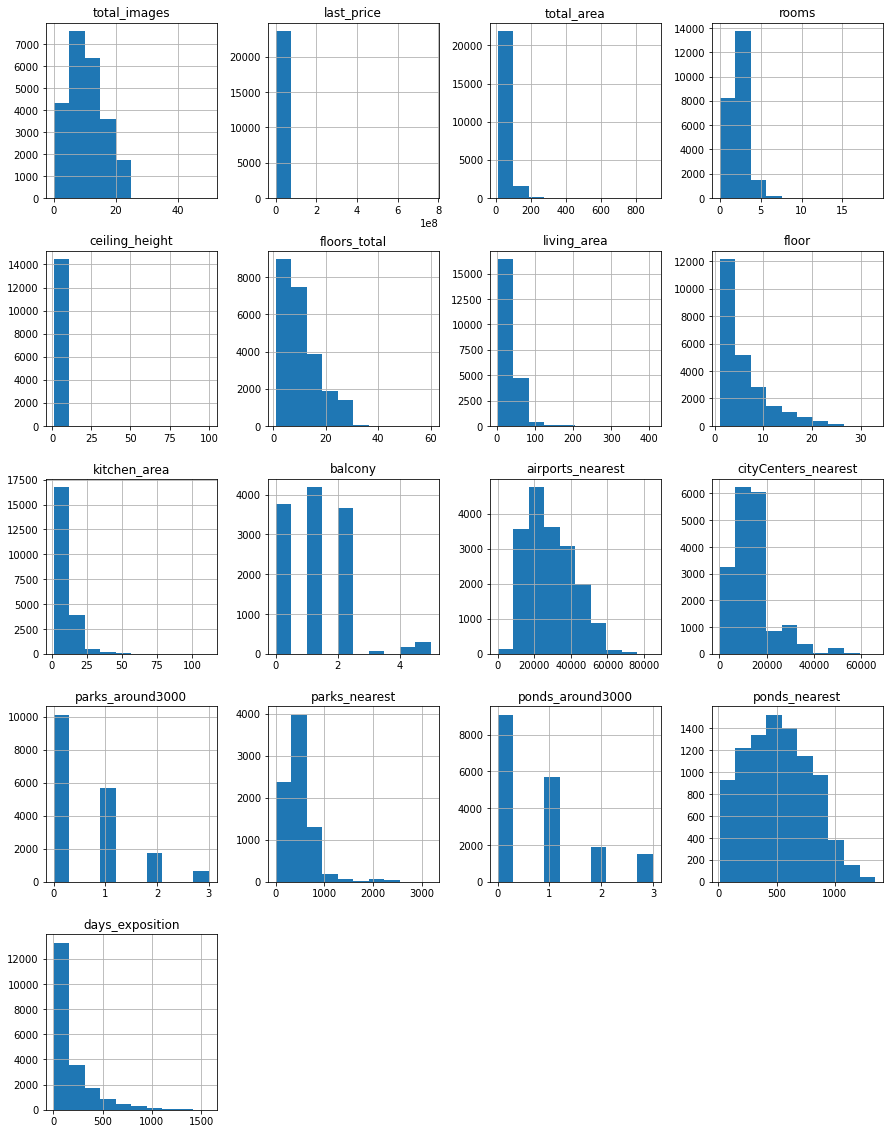

In [6]:
data.hist(figsize=(15,20));

В данных есть проблемы с пропусками, дубликатами, типом данных и т.д. 
Посмотрев на гистограммы можно заметить, что в столбцах **last_price**, **total_area**, **rooms**, **ceiling_height**, **floors_total**, **living_area**, **kitchen_area**, **days_exposition**, есть странные (достаточно большие) значения

В столбцах **ceiling_height**, **parks_nearest**, **ponds_nearest**, **balcony** много пропусков.


Например:
- в столбце **last price**, по гистограмме видно, что в основном стоимость не превышает $2\cdot 10^8$, но также есть недвижимость стоимость, стоимость  которой $8\cdot 10^8$ (аномалия).
- высота столбца **ceiling_height** равна примерно 14 000 (кол-во значений), а всего примерно 23 000 строчки.


### Предобработка данных

Выведем количество пропусков в каждом столбце **data**:


In [7]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Получим описание всех числовых столбцов:

In [8]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Получим количество явных дубликатов:

In [9]:
data.duplicated().sum()


0

Вполне ожидаемо, что количество явных дубликатов равно 0.

#### Обработка пропусков

- total_images (не требует обработки пропусков, все строки заполнены)              
- last_price (не требует обработки пропусков, все строки заполнены)                  
- total_area (не требует обработки пропусков, все строки заполнены)                    
- first_day_exposition (не требует обработки пропусков, все строки заполнены)          
- rooms (не требует обработки пропусков, все строки заполнены)                         
- **ceiling_height**         
- **floors_total**               
- **living_area**              
- floor (не требует обработки пропусков, все строки заполнены)   
- **is_apartment**           
- studio (не требует обработки пропусков, все строки заполнены) 
- open_plan (не требует обработки пропусков, все строки заполнены) 
- **kitchen_area**             
- **balcony**                 
- **locality_name**              
- **airports_nearest**         
- **cityCenters_nearest**      
- **parks_around3000**         
- **parks_nearest**           
- **ponds_around3000**         
- **ponds_nearest**           
- **days_exposition**          


В выделенных столбцах нужно по возможности обработать пропуски.

Начнем с столбцов в которых пустые значения можно заменить на нули:

- **is_apartment**, пропуски скорее всего получены из-за того, что человек вносивший данные не знал что такое апартаменты, столбец состоит из булевых значений, пропуски заполним нулями.  

- **balcony**, заполним нулями, поскольку если количество балконов не указано, скорее всего их нет.

- **parks_around3000**, **ponds_around3000**  пока заполним нулями, позже вернемся.
- **days_exposition** заполним пустые значения нулями, данных по длительности нет, значит объявление сняли в течении первого дня.



In [10]:
data['is_apartment'] = data['is_apartment']. fillna (False)
data['parks_around3000'] = data['parks_around3000']. fillna (0)
data['ponds_around3000'] = data['ponds_around3000']. fillna (0)
data['balcony'] = data['balcony'].fillna(0)

Далее удалим строки строки с пустыми значениями в столбцах: **locality_name** (в недвижимости без расположения, нет смысла).

In [11]:
data['locality_name'].isna().sum()/data['locality_name'].count()*100

0.20718816067653278

Можем это сделать поскольку доля недвижимости без названия **< 1%**

Пустые значения **total_floor** заполним значениями столбца **floor**, будем считать что если значение **total_floor** не заполняли, то **floor** последний этаж.

In [12]:
data.loc[data['floors_total'].isna(),'floors_total'] = data['floor']

Рассмотрим пустые значения в столбце **kitchen_area**:
- пустые строки нельзя удалить, поскольку доля недвижимости без кухни составляет 10%;
- можно предположить, что есть недвижимость без кухни, и при заполнении, при осутствии кухни пропускали этот пункт. Заполним нулями.

In [13]:
data['kitchen_area'].isna().sum()/data['kitchen_area'].count()*100

10.634424163204333

In [14]:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = 0

Пустые строчки стоблца **ceiling_height** заполним медианным значением.

In [15]:
data.loc[data['ceiling_height'].isna(),'ceiling_height'] = data['ceiling_height'].median()

Столбец **living_area**:
- посчитаем количество строк, где не пустые значения в столбцах **kitchen_area** и **total_area**  и пустые значения в столбце **living_area**;

In [16]:
data[(~data['total_area'].isna())&(~data['kitchen_area'].isna())&(data['living_area'].isna())]['total_area'].count()

1903

- заполним столбец **living_area**, значениями полученными путем вычитания **kitchen_area** из **total_area**. (если **kitchen_area** = 0, то **living_area** = **total_area**.)

In [17]:
data.loc[(~data['total_area'].isna())&(~data['kitchen_area'].isna())&(data['living_area'].isna()),'living_area'] = data['total_area'] - data['kitchen_area']

Проверим столбцы **parks_around3000**, **ponds_around3000** сопоставив их с столбцами **parks_nearest**, **ponds_nearest**. (Возможно где-то расстояние до парка меньше трех тысяч метров, а в количестве парков до 3000 метров стоит ноль, тоже самое для водоемов.)

In [18]:
data.loc[(data['parks_nearest']<=3000)&(data['parks_around3000'].isna()), 'parks_around3000'].count()


0

In [19]:
data.loc[(data['ponds_nearest']<=3000)&(data['ponds_around3000'].isna()), 'ponds_around3000'].count()


0

Данная проверка ничего не дала, оставляем пропуски  в столбцах **parks_around3000**, **ponds_around3000**.

In [20]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,159.00,9,False,False,False,0.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,52.70,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


К столбцам **ponds_nearest**, **cityCenters_nearest**, **airports_nearest**, **ponds_nearest** вернемся после удаления дубликтов по столбцу **locality_name**.

#### Изменение типов данных

| Столбец |Тип данных | Новый тип данных(если надо) |
| --- | --- | --- |
| total_images | int64 | - |
| last_price | float64 | - |
  total_area  |  float64
  first_day_exposition | object | datetime (удобный формат, для работы с датой) | 
  rooms | int64 | - |  
  ceiling_height | float64 | - |
  floors_total | float64 | int (т.к. принимает только натуральные значения) |
  living_area | float64 | - |
  floor | int64 | - |  
  is_apartment | object | bool (либо является аппартаментом, либо нет) | 
  studio | bool | - |   
  open_plan | bool | - |   
  kitchen_area | float64 | - |
  balcony | float64 | int |
  locality_name | object | - | 
  airports_nearest | float64 | - |
  cityCenters_nearest | float64 | - |
  parks_around3000 | float64 | int (т.к. принимает только натуральные значения)|
  parks_nearest | float64 | - |
  ponds_around3000 | float64 | int (т.к. принимает только натуральные значения) |
  ponds_nearest | float64 | - |
  days_exposition | float64 | int (т.к. принимает только натуральные значения)|

In [21]:
data['is_apartment'] = data['balcony'].astype('bool')

In [22]:
for k in ['floors_total','parks_around3000','balcony','ponds_around3000']:
    data[k] = data[k].astype('int')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [24]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'] ,format='%Y-%m-%d %H:%M')
print(data.head())


   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70            16         51.0      8         False   False   
1            2.65            11         18.6      1          True   False   
2            2.65             5         34.3      4         False   False   
3            2.65            14        159.0      9         False   False   
4            3.03            14         32.0     13         False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0        0 

#### Устранение дубликатов

**Задание**: Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

In [25]:
len(data['locality_name'].unique())

365

In [26]:
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок')


In [27]:
len(data['locality_name'].unique())

319

#### Обработка аномалий

Рассмотрим аномалии в столбце **ceiling_height**, вряд ли высота потолка может быть 100 м.

In [28]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Если высота потолка больше 20 метров, значение умножаем на 0.1

In [29]:
data.loc[data['ceiling_height']>7, 'ceiling_height'].count()/data['ceiling_height'].count()*100

0.12236803240643064

Отбросим данные, где потолки > 7 метров, можем это сделать так как их доля состовлят пол процента

In [30]:
n_data = data[data['ceiling_height']<=7]

Рассмотрим аномалии в столбце **last_price**, будем считать что стоимость квартир не должна превышать 35 млн.руб:

In [31]:
n_data['last_price'].describe()

count    2.367000e+04
mean     6.543609e+06
std      1.089310e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [32]:
n_data.loc[data['last_price']>20000000, 'last_price'].count()/n_data['last_price'].count()*100

2.9869032530629487

In [33]:
n_data = n_data[n_data['last_price']<=20000000]

Отбросим данные, где цена > 20 000 000, можем это сделать так как их доля состовлят пол процента

Рассмотрим аномалии в столбце **rooms**, будем считать что количество комнат не должно превышать 5:

In [34]:
n_data['rooms'].describe()

count    22963.000000
mean         2.010756
std          0.986459
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

In [35]:
n_data.loc[n_data['rooms']>5, 'rooms'].count()/n_data['rooms'].count()*100

0.3962896834037365

In [36]:
n_data = n_data[n_data['rooms']<=5]

Рассмотрим аномалии в столбце **total_area**:

In [37]:
n_data['total_area'].describe()

count    22872.000000
mean        56.274202
std         23.483049
min         12.000000
25%         39.975000
50%         51.000000
75%         67.000000
max        263.800000
Name: total_area, dtype: float64

In [38]:
n_data.loc[n_data['total_area']>150, 'total_area'].count()/n_data['total_area'].count()*100

0.5640083945435467

Будем считать, что площадь квартиры не должна превышать 150 кв.метров:

In [39]:
n_data = n_data[n_data['total_area']<=150]

In [40]:
n_data.shape[0] / data.shape[0]

0.9596607451791215

In [41]:
#переприсвоем, чтобы не таскаться с различными таблицами
data = n_data

Избавились от всех аномальных данных при этом датафрейм уменьшился на 5%

### Посчитайте и добавьте в таблицу новые столбцы

Добавьте в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [42]:
# цена одного кваратного метра
data['kmetr_price'] = data['last_price']/data['total_area']
# день недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
# месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month
# год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year


In [43]:
def categorize_floor(floor, total_floor):
    try:
        if floor == 1:
            return 'первый'
        elif (floor > 1)&(floor!= total_floor):
            return 'другой'
        elif floor == total_floor:
            return 'последний'
    except:
        pass

In [44]:
data['floor_type'] = data.apply(lambda x: categorize_floor(x['floor'], x['floors_total']), axis=1)
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000)

In [45]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kmetr_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.789474,0,9,2018,другой,NaN


### Проведите исследовательский анализ данных

Изучите следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.
Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

In [46]:
data.loc[:,['total_area','living_area','kitchen_area','last_price', 'rooms', 'ceiling_height', 'floor', 'floor_type', 'floors_total','cityCenters_nearest','airports_nearest', 'parks_nearest','weekday_exposition','month_exposition']].corr()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest,weekday_exposition,month_exposition
total_area,1.000000,0.860200,0.443614,0.760774,0.795457,0.330186,-0.026888,-0.034408,-0.194046,-0.019363,0.013117,-0.012229,0.011065
living_area,0.860200,1.000000,0.056858,0.595289,0.806930,0.248858,-0.105459,-0.141280,-0.169151,-0.040442,-0.013359,0.005432,-0.001846
kitchen_area,0.443614,0.056858,1.000000,0.475794,0.146409,0.237879,0.132246,0.181796,-0.120303,0.018734,0.040060,-0.027506,0.020721
last_price,0.760774,0.595289,0.475794,1.000000,0.473299,0.398106,0.097960,0.127370,-0.355805,-0.031372,0.064551,-0.016518,0.007638
rooms,0.795457,0.806930,0.146409,0.473299,1.000000,0.146891,-0.165219,-0.223303,-0.123548,-0.049828,-0.043731,-0.002077,-0.000911
ceiling_height,0.330186,0.248858,0.237879,0.398106,0.146891,1.000000,-0.034834,-0.057287,-0.271281,-0.077818,-0.046495,-0.017815,-0.002427
floor,-0.026888,-0.105459,0.132246,0.097960,-0.165219,-0.034834,1.000000,0.675987,0.002209,0.069287,0.072858,0.010703,0.017692
floors_total,-0.034408,-0.141280,0.181796,0.127370,-0.223303,-0.057287,0.675987,1.000000,-0.001349,0.104483,0.094636,0.011296,0.014386
cityCenters_nearest,-0.194046,-0.169151,-0.120303,-0.355805,-0.123548,-0.271281,0.002209,-0.001349,1.000000,0.267772,-0.056455,0.009008,-0.012477
airports_nearest,-0.019363,-0.040442,0.018734,-0.031372,-0.049828,-0.077818,0.069287,0.104483,0.267772,1.000000,-0.081577,0.000317,0.004661


In [47]:
data['total_area'].describe()

count    22743.000000
mean        55.592577
std         21.646537
min         12.000000
25%         39.700000
50%         50.800000
75%         66.600000
max        150.000000
Name: total_area, dtype: float64

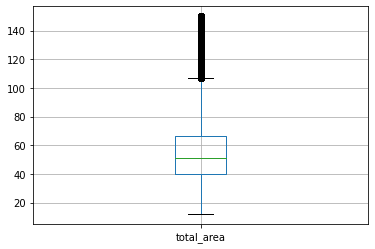

In [48]:
data.boxplot('total_area');

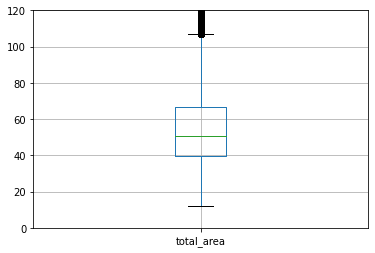

In [49]:
data.boxplot('total_area')
plt.ylim(0,120);

По диаграмме размаха можно заметить, что выбросы начинаются ~ 118 

Доля квартир, площадь которых больше 120 квадратных метров: 1.4


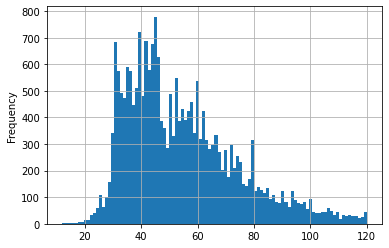

In [50]:
print('Доля квартир, площадь которых больше 120 квадратных метров:',round(data.loc[data['total_area'] >120, 'total_area'].count()/data['total_area'].count()*100,1))
new_data = data[data['total_area']<=120]
new_data['total_area'].plot(kind='hist',bins=100, grid='True');


In [51]:
new_data['living_area'].describe()

count    22427.000000
mean        32.796476
std         15.284234
min          2.000000
25%         18.900000
50%         30.100000
75%         42.000000
max        120.000000
Name: living_area, dtype: float64

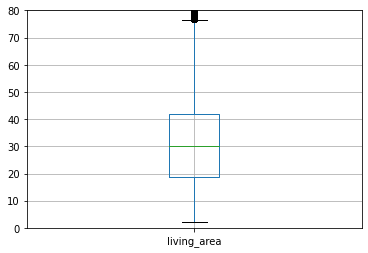

In [52]:
new_data.boxplot('living_area')
plt.ylim(0,80);

Доля квартир, площадь жилой части, которых больше 76 квадратных метров: 1.4


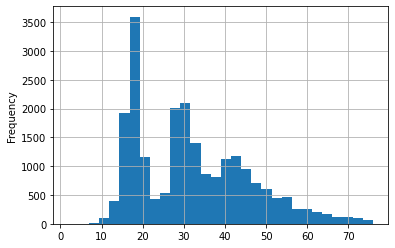

In [53]:

print('Доля квартир, площадь жилой части, которых больше 76 квадратных метров:',round(new_data.loc[new_data['living_area'] >76, 'living_area'].count()/data['living_area'].count()*100,1))
new_data = new_data[new_data['living_area']<=76]
new_data['living_area'].plot(kind='hist', grid='True', bins=30);

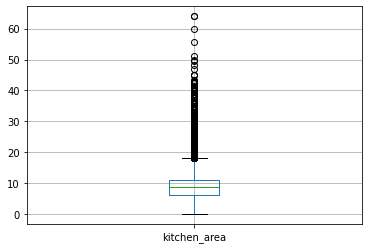

In [54]:
new_data.boxplot('kitchen_area');

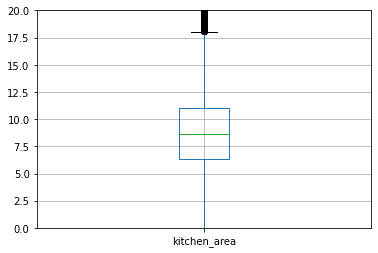

In [55]:
new_data.boxplot('kitchen_area')
plt.ylim(0,20);

In [56]:
new_data['kitchen_area'].describe()

count    22118.000000
mean         9.008197
std          5.000989
min          0.000000
25%          6.300000
50%          8.600000
75%         11.000000
max         64.000000
Name: kitchen_area, dtype: float64

Доля квартир, площадь кухни, которых больше 20 квадратных метров: 2.4


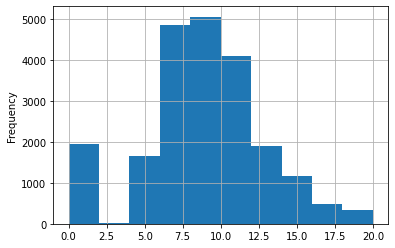

In [57]:
print('Доля квартир, площадь кухни, которых больше 20 квадратных метров:',round(new_data.loc[new_data['kitchen_area']>20, 'living_area'].count()/data['living_area'].count()*100,1))

new_data = new_data[new_data['kitchen_area']<=20]
new_data['kitchen_area'].plot(kind='hist', grid='True');

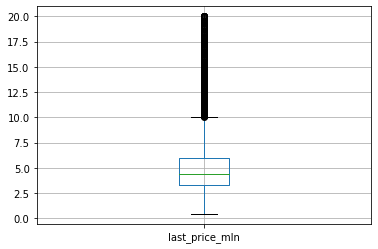

In [58]:
new_data['last_price_mln'] = new_data['last_price']/1000000
new_data.boxplot('last_price_mln');

In [59]:
new_data['last_price_mln'].describe()

count    21569.000000
mean         5.016284
std          2.668989
min          0.430000
25%          3.300000
50%          4.400000
75%          6.000000
max         20.000000
Name: last_price_mln, dtype: float64

Исследовав цену продаж, можно избавиться от слишком низких цен и слишком высоких цен. Это можно сделать, т.к. доля таких записей несущественна, менее 1%.

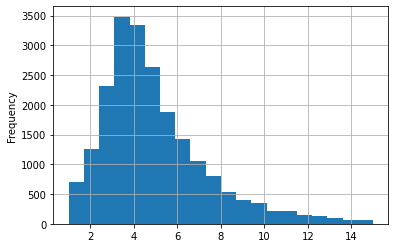

In [60]:
new_data = new_data[new_data['last_price_mln']<15]
new_data = new_data[new_data['last_price_mln']>1]

new_data['last_price_mln'].plot(kind='hist', grid=True, bins=20);

In [61]:
new_data['rooms'].describe()

count    21142.000000
mean         1.920112
std          0.890433
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

In [62]:
new_data.loc[new_data['rooms']>5, 'rooms'].count()/new_data['rooms'].count()*100

0.0

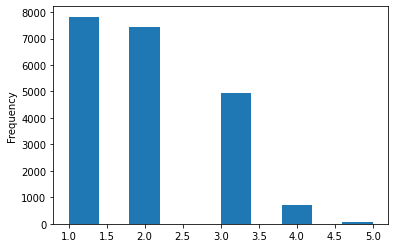

In [63]:
new_data = new_data.loc[(new_data['rooms']<=5)&(new_data['rooms']>=1)]
new_data['rooms'].plot(kind='hist');

In [64]:
new_data['ceiling_height'].describe()

count    20949.000000
mean         2.672421
std          0.181396
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.300000
Name: ceiling_height, dtype: float64

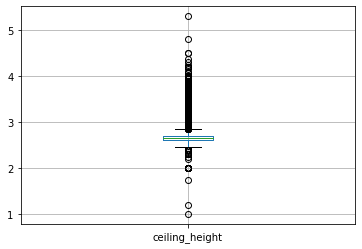

In [65]:
new_data.boxplot('ceiling_height');

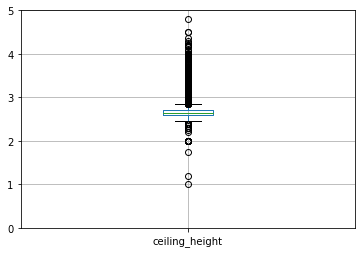

In [66]:
new_data.boxplot('ceiling_height')
plt.ylim(0,5);

Уберем выбросы, в которых высота потолка больше 3.5 и меньше 2.5. Можем это сделать, т.к. доля не превышвет 1%.

In [67]:
#доля квартир, где потолки > 3.5
print(new_data.loc[data['ceiling_height']>3.5,'ceiling_height'].count()/new_data['ceiling_height'].count()*100)
#доля квартир, где потолки < 2.5
print(new_data.loc[data['ceiling_height']<2.5,'ceiling_height'].count()/new_data['ceiling_height'].count()*100)

0.5871401976227982
0.34369182299871115


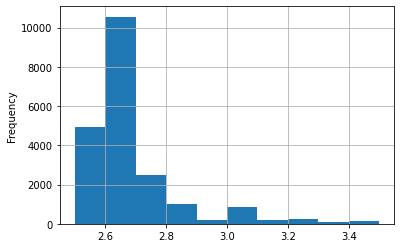

In [68]:
new_data = new_data[new_data['ceiling_height']<=3.5]
new_data = new_data[new_data['ceiling_height']>=2.5]
new_data['ceiling_height'].plot(kind='hist', grid='True');

In [69]:
new_data.loc[:,['total_area','living_area','kitchen_area','last_price', 'rooms', 'ceiling_height', 'floor', 'floor_type', 'floors_total','cityCenters_nearest','airports_nearest', 'parks_nearest','weekday_exposition','month_exposition']].corr()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest,weekday_exposition,month_exposition
total_area,1.000000,0.855344,0.381936,0.713757,0.801113,0.275983,-0.015866,-0.010654,-0.139532,-0.022829,0.020202,-0.005812,0.008821
living_area,0.855344,1.000000,-0.013306,0.543412,0.830977,0.189653,-0.115079,-0.149327,-0.122757,-0.044825,-0.013832,0.010410,-0.005753
kitchen_area,0.381936,-0.013306,1.000000,0.414624,0.059319,0.229182,0.190651,0.280250,-0.091500,0.015687,0.052523,-0.024056,0.031798
last_price,0.713757,0.543412,0.414624,1.000000,0.438020,0.369549,0.138402,0.191072,-0.344388,-0.036042,0.055348,-0.008884,0.003081
rooms,0.801113,0.830977,0.059319,0.438020,1.000000,0.088939,-0.169995,-0.224669,-0.086636,-0.052325,-0.035568,-0.000199,-0.000313
ceiling_height,0.275983,0.189653,0.229182,0.369549,0.088939,1.000000,-0.002114,-0.000126,-0.246729,-0.074445,-0.057213,-0.015135,-0.000681
floor,-0.015866,-0.115079,0.190651,0.138402,-0.169995,-0.002114,1.000000,0.674334,-0.015723,0.068529,0.073070,0.011721,0.018021
floors_total,-0.010654,-0.149327,0.280250,0.191072,-0.224669,-0.000126,0.674334,1.000000,-0.031681,0.099113,0.099385,0.012346,0.013065
cityCenters_nearest,-0.139532,-0.122757,-0.091500,-0.344388,-0.086636,-0.246729,-0.015723,-0.031681,1.000000,0.261474,-0.062099,0.007970,-0.012547
airports_nearest,-0.022829,-0.044825,0.015687,-0.036042,-0.052325,-0.074445,0.068529,0.099113,0.261474,1.000000,-0.101679,-0.000100,0.008673


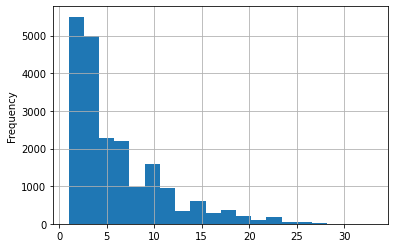

In [70]:
new_data['floor'].plot(kind='hist', grid='True', bins=20);

In [71]:
new_data['floor'].isnull().sum()

0

In [72]:
new_data['floors_total'].describe()

count    20754.000000
mean        10.856606
std          6.592105
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

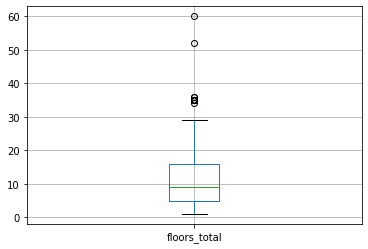

In [73]:
new_data.boxplot('floors_total');

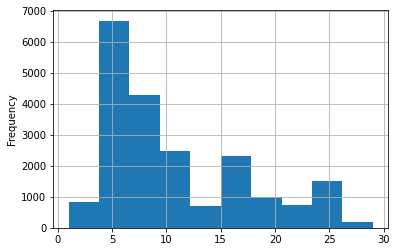

In [74]:
new_data = new_data[new_data['floors_total']<30]
new_data['floors_total'].plot(kind='hist', grid='True');

По графику видно, что больше всего недвижимости с общим количеством этажей ~ 6-7 

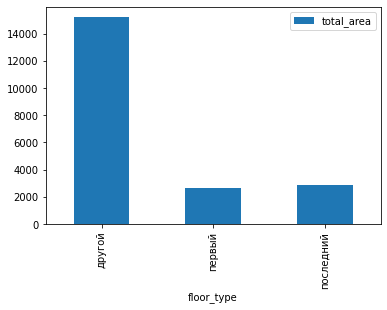

In [75]:
pivot_floor_type = new_data.pivot_table(index = 'floor_type', values = 'total_area', aggfunc='count').plot(kind='bar');

По графику видно, что больше всего объявлений с недвижимостью на "других" этажах. 

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Нет графика для категории этажей
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Добавила график для категории этажей.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

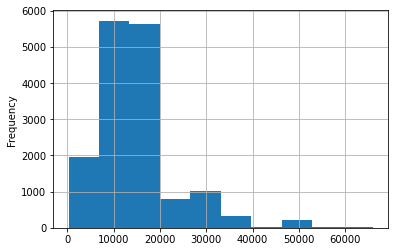

In [76]:
new_data['cityCenters_nearest'].plot(kind='hist', grid='True');

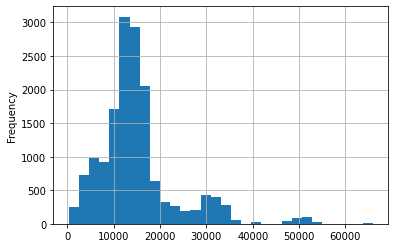

In [77]:
new_data['cityCenters_nearest'].plot(kind='hist', grid='True', bins=30);

По графику заметно что больше всего  объявлений с недвижимостью расположенной в 10-20 км от центра.

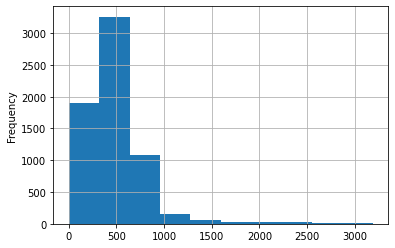

In [78]:
new_data['parks_nearest'].plot(kind='hist', grid='True');

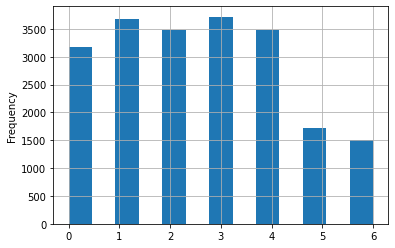

In [79]:
new_data['weekday_exposition'].plot(kind='hist', grid='True', bins = 13);

По графику можно сделать вывод, что объявления чаще вывешивают в будние дни.

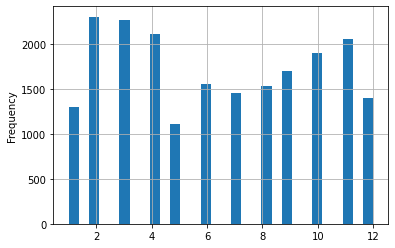

In [80]:
new_data['month_exposition'].plot(kind='hist', grid='True', bins=30);

По графику можно сделать вывод, что объявления реже объвления размещают в летние месяцы (наверное всем не до недвижимости, отдыхают!).

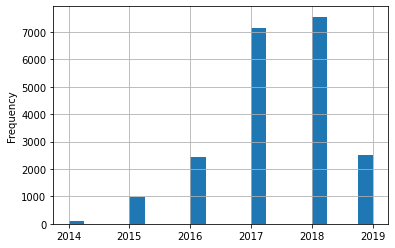

In [81]:
new_data['year_exposition'].plot(kind='hist', grid='True', bins = 20);

По графику можно сделать вывод, что рынок недвижимотси был самым активным в 2017-2018 годах.

#### Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 
Постройте гистограмму.
Посчитайте среднее и медиану.



In [82]:
new_data['days_exposition'].describe()

count    18196.000000
mean       173.922236
std        212.468690
min          1.000000
25%         44.000000
50%         92.000000
75%        220.000000
max       1580.000000
Name: days_exposition, dtype: float64

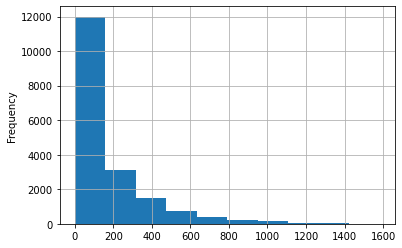

In [83]:
new_data['days_exposition'].plot(kind='hist', grid=True);

По графику видно, что недвижимость чаще всего продавлась в течении 200 дней

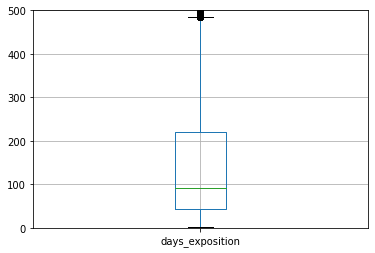

In [84]:
new_data.boxplot('days_exposition')
plt.ylim(0, 500);

In [85]:
new_data.sort_values('days_exposition', ascending = False)['days_exposition'].head()

18843    1580.0
9553     1553.0
1885     1513.0
6691     1512.0
14093    1497.0
Name: days_exposition, dtype: float64

25% процентов квартир продается за 24, достаточно быстро (по 1 квантилю)

75% процентов квартир продается за 194, достаточно долго (по 3 квантилю)

По диаграмме размаха, получаем, что слишком долгие продажи > 450 дней

Посмотрим на гистограмму поближе:

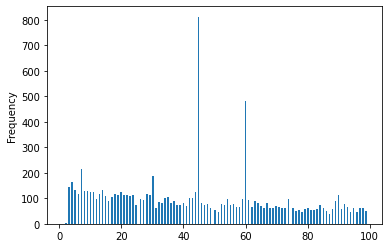

In [86]:
new_data.loc[(new_data['days_exposition']<100)&(new_data['days_exposition']>0), 'days_exposition'].plot(kind='hist', bins=200);

По гисторамме видно, что примерно на 45-46 и на 60-61 день резко возрастают продажи, может объявления удаляют и заново вывешивают для актуализации (?) (чтобы они поднялись вверх в списке объявлений, вряд ли все бегут покупать недвижимость на 45 и на 60 день объявления)

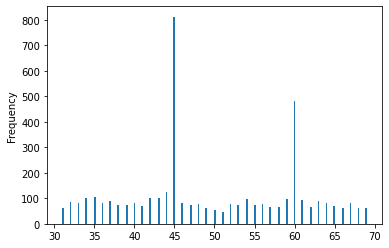

In [87]:
new_data.loc[(new_data['days_exposition']<70)&(new_data['days_exposition']>30), 'days_exposition'].plot(kind='hist', bins=200);

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
 Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

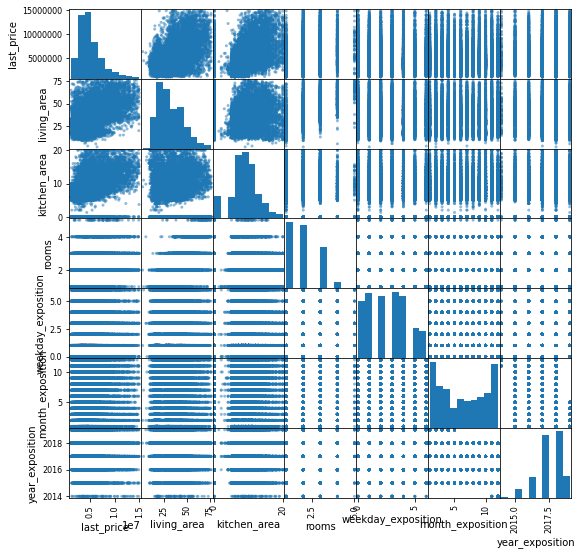

In [88]:
new_data_price = new_data.loc[:,['last_price','living_area','kitchen_area','rooms','floor_type','weekday_exposition','month_exposition','year_exposition']]

pd.plotting.scatter_matrix(new_data_price, figsize=(9, 9));

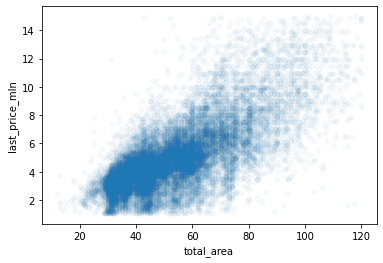

In [89]:
new_data.plot(kind='scatter', x ='total_area', y='last_price_mln', alpha = 0.03);

In [90]:
new_data['total_area'].corr(new_data['last_price_mln'])

0.7135365046587692

По значению корреляции видно, что цена  всегда увеличаивается с увеличением площади.

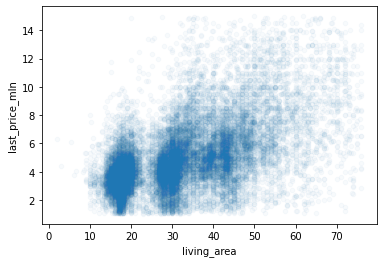

In [91]:
new_data.plot(kind='scatter', x ='living_area', y='last_price_mln', alpha = 0.03);

In [92]:
new_data['living_area'].corr(new_data['last_price_mln'])

0.543426830884183

Корреляция в 0.543 говорит о наличии связи, однако не слишком сильной.
Чем больше площадь жилого пространства, тем больше цена, но так не всегда.

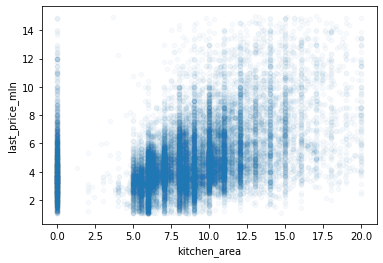

In [93]:
new_data.plot(kind='scatter', x ='kitchen_area', y='last_price_mln', alpha = 0.03);

In [94]:
new_data['kitchen_area'].corr(new_data['last_price_mln'])


0.41440620821726626

Корреляция в 0.41 говорит о наличии связи, однако не слишком сильной.
Чем больше кухни, тем больше цена, но так не всегда.

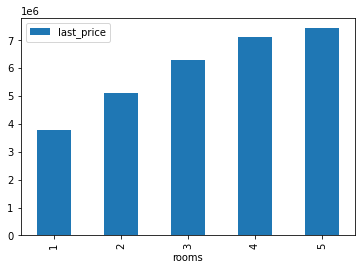

In [95]:
new_data_rooms = new_data.pivot_table(index ='rooms', values ='last_price').plot(kind='bar');

In [96]:
new_data['rooms'].corr(new_data['last_price_mln'])


0.4381375014725026

Видно, что при увелечении количества комнат увеличивается средняя цена, но не так сильно, кватриры с 4 и 5 комнатами почти не отличаюся.

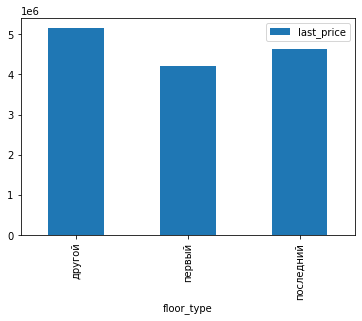

In [97]:
new_data_pivot_floor = new_data.pivot_table(index ='floor_type', values ='last_price').plot(kind='bar');

По диаграмме видно, что цены на "другой" этаж выше, чем на "первый" или "последний", связано скорее всего что недвижимость на первом и последнем этаже требует больше расходов, и менее респектабельна.

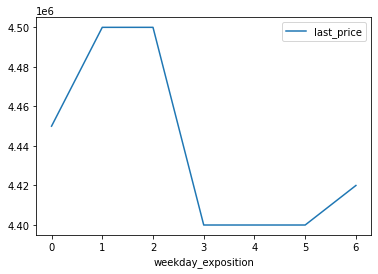

In [98]:
new_data_pivot_floor = new_data.pivot_table(index ='weekday_exposition', values ='last_price',aggfunc='median').plot();

По графику видно, что пик выставления объявлений с большей стоимостью приходится на первую половину недели, к концу недели выставляют квартиры с меньшей стоимостью.

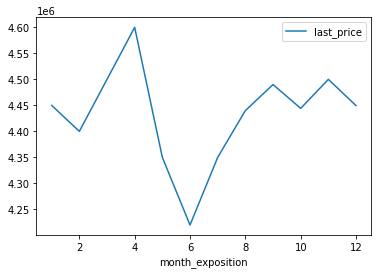

In [99]:
new_data_pivot_floor = new_data.pivot_table(index ='month_exposition', values ='last_price',aggfunc='median').plot();

По графику видно, что чаще выставляют объявлений в весенние и осенние месяцы, летом выставляют квартиры с меньшей стоимостью. Связано это скорее всего, с тем что летом многие отдыхают.

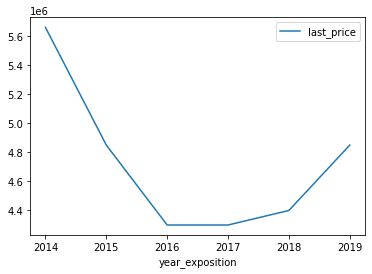

In [100]:
new_data_pivot_floor = new_data.pivot_table(index ='year_exposition', values ='last_price',aggfunc='median').plot();

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [101]:
pivot = new_data.pivot_table(index = 'locality_name', values = 'kmetr_price', aggfunc = ['count', 'mean'])
pivot = pivot.sort_values([('count', 'kmetr_price')], ascending = False)

print(pivot.head(10))

                        count           mean
                  kmetr_price    kmetr_price
locality_name                               
Санкт-Петербург         13416  106759.522047
поселок Мурино            521   85174.189550
поселок Шушары            424   78487.564870
Всеволожск                375   66964.226035
Колпино                   329   75353.286396
Пушкин                    319  100848.027796
поселок Парголово         315   90741.693405
Гатчина                   298   69064.876289
деревня Кудрово           269   92820.051173
Выборг                    211   58951.756287


In [102]:
pivot.head(10).sort_values([('mean', 'kmetr_price')],ascending = False).head(1)

,count,mean
,kmetr_price,kmetr_price
locality_name,,
Санкт-Петербург,13416,106759.522047


In [103]:
pivot.head(10).sort_values([('mean', 'kmetr_price')],ascending = False).tail(1)

,count,mean
,kmetr_price,kmetr_price
locality_name,,
Выборг,211,58951.756287


#### Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [104]:
data_saint = new_data.loc[data['locality_name'] == 'Санкт-Петербург',:]
data_saint['1km_center'] = data_saint['last_price']/data_saint['cityCenters_nearest_km']

/tmp/ipykernel_728/2300879681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_saint['1km_center'] = data_saint['last_price']/data_saint['cityCenters_nearest_km']


In [105]:
data_saint.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kmetr_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km,last_price_mln,1km_center
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0,5.196,371142.857143
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,52.7,22,True,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.692737,3,4,2019,другой,12.0,7.915,659583.333333
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,True,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.590164,6,2,2017,другой,15.0,5.400,360000.000000
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,127525.252525,3,11,2017,другой,14.0,5.050,360714.285714
15,16,4650000.0,39.0,2017-11-18,1,2.65,14,20.5,5,True,False,False,7.6,1,Санкт-Петербург,12900.0,14259.0,1,590.0,1,296.0,19.0,119230.769231,5,11,2017,другой,14.0,4.650,332142.857143


In [106]:
data_saint['last_price'].describe()

count    1.341600e+04
mean     5.789357e+06
std      2.370091e+06
min      1.190000e+06
25%      4.100000e+06
50%      5.150000e+06
75%      6.890000e+06
max      1.499800e+07
Name: last_price, dtype: float64

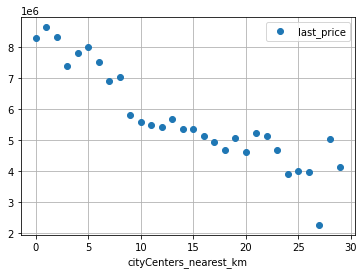

In [107]:
data_saint.pivot_table(index = 'cityCenters_nearest_km', values='last_price').plot(style='o', grid=True);

По графику видно, что чем меньше расстояние от центра города, тем больше цена недвижимости, но не всегда есть значения которые выбиваются из правила.

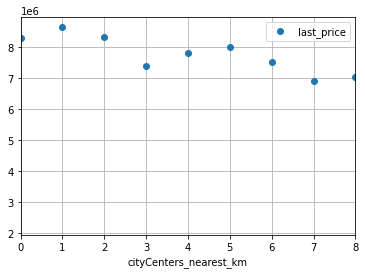

In [108]:
data_saint.pivot_table(index = 'cityCenters_nearest_km', values='last_price').plot(style='o', grid=True)
plt.xlim(0,8);

In [109]:
data_saint['last_price'].corr(data_saint['cityCenters_nearest'])


-0.356886123604562

### Общий вывод

**Часть 1.** Была выгружена и изучена информация о датафрейме. Построенные гисторгаммы по всем столбцам с числовыми значениями.

**Часть 2.** В данной части была произведена предобработка данных, по возможности были заполнены столбцы с пустыми значениями, в некоторых случаях  пустые строки были удалены, например в столбце **locality_name**. Также в некоторых столбцах пустые строки были заполнены 0 или медианным значением, в зависимости от значений столбцов.

**Часть 3.** В некоторых столбцах была произведено изменение типа, опять же взависимости от столбца. Например: столбец **floors_total** хранит в себе количество этажей, которые принимают только натуральные значения. Незачем, чтобы этот столбец был float и т.д.

**Часть 4.** Далее были изучены уникальные значения в столбце с названиями и устранены неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. 
Также были устранены редкие и выбивающиеся значения в столбцах **last_price**, **rooms**, **total_area**, **ceiling_height**.
 

**Часть 5.** В таблицу были добавлены новые столбцы со следующими параметрами:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

**Часть 6.** Был проведен исследовательский анализ данных. Изучены следующие параметры объектов:
- общая площадь, жилая площадь, площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Для данных параметров были получены гистограммы, где казалось нужным и имелась возможность был построен график размаха, данные выбивающиеся из выборки были исключены.

**Часть 7.** Было изучено, как быстро продавались квартиры (столбец days_exposition). Быстро продающимися считаются квартиры, которые продаются меньше чем за один месяц, очень долго продающимися квартирами, являются квартиры которые продаются больше чем за 450 дней. Были получены аномально высокие продажи на 45 и 60 день, не очень понятно откуда они взялись (вопрос к Яндекс.Недвижимость)

**Часть 8.** Было изучено какие факторы больше всего влияют на общую (полную) стоимость объекта. Сильнее всего влияет общая площадь, площадь жилой части и площадь кухни влияют не очень сильно. Количество комнат также не сильно влияет на стоимость, например у комнат с 4 и 5 комнатами почти одинаковая средняя стоимость. Если квартира расположена на "другом" этаже (все этажи, кроме первого и последнего), то средняя цена квартиры выше. Были пострены графики указывающие зависимость параметров.

**Часть 9.** Была подсчитана цена одного квадратного метра в 10 населенных пунктах снаибольшим числом объявлений. Населеный пункт с самой высокой стоимостью квадратного метра - Санкт-Петербург (106758.258481), с самой низкой стоимостью квадратного метра - Выборг  (58951.756287)

**Часть 10** Былии выделены квартиры в Санкт-Петербурге и вычеслена средняя цена каждого километра. Было получено, что чем дальше от центра, тем дешевле объекты.

